In [22]:
import snscrape.modules.twitter as sntwitter
import pandas as pd 
from time import *
import psycopg2
import config

In [23]:
class Tweet_list():

    def tweets_list1(self):

        dbname = 'machine'
        user = 'postgres'
        password = 'AngelM09'
        host = 'localhost' 
        port = 5432
        cur = None
        conn = None
        
        try:
            conn = psycopg2.connect(
                    dbname = dbname,
                    user = user,
                    password = password,
                    host = host, 
                    port = port   
            )

            cur = conn.cursor()

            cur.execute('DROP TABLE IF EXISTS Machine_twitter')

            create_table =  '''CREATE TABLE IF NOT EXISTS Machine_twitter (
                id      serial PRIMARY KEY,
                Tweet   text,
                Tweet_id    BIGINT,
                Timestamp   timestamp,
                Replys   int,
                Retweets    int,
                Likes   int,
                Username    VARCHAR)''' 

            cur.execute(create_table)

            for i, tweet in enumerate(sntwitter.TwitterSearchScraper('from:TheHoopCentral').get_items()):
                if i > 5:
                    break
                insert_tweet = 'INSERT INTO Machine_twitter (Tweet, Tweet_id, Timestamp, Replys, Retweets, Likes, Username) VALUES (%s, %s, %s, %s,%s, %s, %s)'
                insert_values = (tweet.content, tweet.id, tweet.date, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.user.username)
                cur.execute(insert_tweet, insert_values)
                
            conn.commit()
            print('completed')

        except Exception as error:
                print(error)  

        finally:
            if cur is not None:
                cur.close()
            if conn is not None:
                conn.close()


In [24]:
tweets = Tweet_list()
tweets2 = Tweet_list()

tweets2.tweets_list1()

completed


In [11]:
import snscrape.modules.instagram as sninstagram

class insta():

    def instagram(self):

        dbname = 'machine'
        user = 'postgres'
        password = 'AngelM09'
        host = 'localhost' 
        port = 5432
        cur = None
        conn = None
        
        try:
            conn = psycopg2.connect(
                    dbname = dbname,
                    user = user,
                    password = password,
                    host = host, 
                    port = port   
            )

            cur = conn.cursor()

            cur.execute('DROP TABLE IF EXISTS Machine_instagram')

            create_table =  '''CREATE TABLE IF NOT EXISTS Machine_instagram (
                id   serial PRIMARY KEY,
                url  char,
                date timestamp,
                content char,
                thumbnailUrl char,
                displayUrl char,
                username char,
                likes int,
                comments int,
                commentsDisabled bool,
                isVideo bool)'''

            cur.execute(create_table)

            for b in enumerate(sninstagram.InstagramUserScraper(username='houston_2731').get_items()):
                insert_insta = 'INSERT INTO Machine_instagram (url, date, content,thumbnailUrl, displayUrl, username, likes, comments, commentsDisabled, isVideo) VALUES (%s, %s, %s, %s,%s, %s, %s, %s, %s, %s)'
                insert_values = [(b)]
                for records in insert_values:
                    cur.execute(insert_insta, records)
            
            conn.commit()
            print('completed')

        except Exception as error:
                print(error)  

        finally:
            if cur is not None:
                cur.close()
            if conn is not None:
                conn.close()


In [ ]:
insta1 = insta()

insta1.instagram()

In [ ]:
from lib2to3.pgen2 import driver
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.common.exceptions import *
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.alert import Alert
from webdriver_manager.opera import OperaDriverManager

driver = webdriver.Opera(executable_path=OperaDriverManager().install())

video_list = []

url = "https://www.tiktok.com"

driver.implicitly_wait(30)

driver.get(url)

popup = driver.find_element(By.XPATH,'captcha_verify_container style__CaptchaWrapper-sc-1gpeoge-0 zGYIR')

driver.implicitly_wait(30)
first_video = driver.find_element(By.XPATH,'//*[@id="app"]/div[2]/div[2]/div/div[2]/div[2]/div/div[1]')
driver.execute_script('arguments[0].scrollIntoView();',first_video)
if Alert(driver) is True:
    Alert(driver).dismiss()
actions = webdriver.ActionChains(driver)
actions.move_to_element(first_video)
actions.click(first_video)
actions.perform()
if Alert(driver) is True:
    Alert(driver).dismiss()
driver.implicitly_wait(30)
name = driver.find_element(By.XPATH,'//*[@id="app"]/div[2]/div[3]/div[2]/div[1]/a[2]/span[1]').text
video = driver.find_element(By.XPATH,'//*[@id="app"]/div[2]/div[3]/div[1]/div[2]/div[1]/div/video').text
likes = driver.find_element(By.XPATH,'//*[@id="app"]/div[2]/div[3]/div[2]/div[2]/div[2]/div[1]/div[1]/button[1]/strong').text
comments = driver.find_element(By.XPATH,'//*[@id="app"]/div[2]/div[3]/div[2]/div[2]/div[2]/div[1]/div[1]/button[2]/strong').text
plays = driver.find_element(By.XPATH,'//*[@id="app"]/div[2]/div[2]/div/div[2]/div[2]/div/div[1]/div[1]/div/div/a/div/div[2]/strong').text

vids ={
    'Name':name,
    'Video':video,
    'Likes':likes,
    'Comments':comments,
    'Plays':plays
}
video_list.append(vids)


[WDM] - Getting latest opera release info for v.99.0.4844.51
[WDM] - Trying to download new driver from https://github.com/operasoftware/operachromiumdriver/releases/download/v.99.0.4844.51/operadriver_win64.zip
[WDM] - Driver has been saved in cache [C:\Users\houst\.wdm\drivers\operadriver\win64\v.99.0.4844.51]


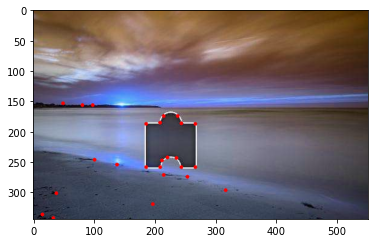

In [1]:
from lib2to3.pgen2 import driver
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.common.exceptions import *
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.alert import Alert
from webdriver_manager.opera import OperaDriverManager
from PIL import Image
import urllib.request
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axisartist.axislines import Axes
import cv2 as cv

driver = webdriver.Opera(executable_path=OperaDriverManager().install())

video_list = []

url = "https://www.tiktok.com/@nkosazana_daughter"


driver.get(url)

try:
    driver.implicitly_wait(30)
    popup = driver.find_element(By.XPATH,'.//*[@id="tiktok-verify-ele"]/div')

    if popup == NoSuchElementException:
        driver.quit()
    
    elif popup is not None:
        popup_pic = driver.find_element(By.XPATH, './/*[@id="captcha-verify-image"]')
        

except Exception as e:
    print(e)

finally:
    if popup == NoSuchElementException:
        driver.close()
    elif Alert is True:
        Alert(driver).dismiss()
    else:
        pic = popup_pic.get_attribute('src')
        urllib.request.urlretrieve(pic, 'pic.png')
        filename = 'pic.png'
        img = cv.imread(filename)
        gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

        corners = cv.goodFeaturesToTrack(gray,25,0.01,10)
        corners = np.int0(corners)

        for i in corners:
            x,y = i.ravel()
            cv.circle(img,(x,y),3,255,-1)

        plt.imshow(img),plt.show()

        
